In [67]:
#!pip install node
#!pip install npm
#!pip install sodapy
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import os
import datetime
import csv
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sns


from config import austin_key
from config import austin_app

In [17]:
app_token= austin_app

url = "https://data.austintexas.gov/resource/fdj4-gpfu.json?"
#crime_history = pd.DataFrame()
i=1
for i in range (1, 15):
    
    app_token= austin_app
    crime= "DEL CONTROLLED SUB/NARCOTIC"


    query_url = f"{url}$$app_token={app_token}&$limit=50000&$offset={50000*i}"
    response = requests.get(query_url).json()
    if i == 1:
        crime_history=pd.DataFrame(response)
        
    else:
        
        crime_history=crime_history.append(response)
crime_history.count()

incident_report_number         700000
crime_type                     700000
ucr_code                       700000
family_violence                700000
occ_date_time                  700000
occ_date                       700000
occ_time                       700000
rep_date_time                  700000
rep_date                       700000
rep_time                       700000
location_type                  696729
address                        700000
zip_code                       694767
council_district               692861
sector                         696460
district                       696308
pra                            695471
x_coordinate                   695764
y_coordinate                   695764
latitude                       686006
longitude                      686006
location                       686006
:@computed_region_a3it_2a2z    685987
:@computed_region_8spj_utxs    683907
:@computed_region_q9nd_rr82    684724
clearance_status               629488
clearance_da

In [91]:
moon_df = pd.read_csv("moon-phase-calendar-landscape_copy.csv")
moon_df = pd.DataFrame(moon_df)
moon_df = moon_df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])
moon_df.head()
#change to date time object and rename column
moon_df['Local Date']= pd.to_datetime(moon_df['Local Date'])

moon_df.head(50)

,Lunar Phase,Local Date,Local Time
0,New Moon,2014-01-01,5:15
1,First Quarter,2014-01-07,21:40
2,Full Moon,2014-01-15,22:53
3,Last Quarter,2014-01-23,23:21
4,New Moon,2014-01-30,15:40
5,First Quarter,2014-02-06,13:22
6,Full Moon,2014-02-14,17:54
7,Last Quarter,2014-02-22,11:16
8,New Moon,2014-03-01,2:02
9,First Quarter,2014-03-08,7:27


In [19]:
crime_df = pd.DataFrame(crime_history)
crime_df.head()
#if you want to group your data by time you have to do resample not .groupby(), can resample by days or by months, check time example pushed out last week
#compare if crime occurs more at night consistently vs increasing during full moon
#could sample by moon phase or day date 
#pick 10 full moon days and compare count to 10 non full moon days 

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,clearance_status,clearance_date,ucr_category,category_description,:@computed_region_qwte_z96m,census_tract
0,20202411283,FAMILY DISTURBANCE,3400,N,2020-08-28T19:00:00.000,2020-08-28T00:00:00.000,1900,2020-08-28T19:47:00.000,2020-08-28T00:00:00.000,1947,...,"{'latitude': '30.15772825', 'longitude': '-97....",3637,5,1,NaN,NaN,NaN,NaN,NaN,NaN
1,20202411278,FAMILY DISTURBANCE,3400,N,2020-08-28T18:57:00.000,2020-08-28T00:00:00.000,1857,2020-08-28T18:57:00.000,2020-08-28T00:00:00.000,1857,...,"{'latitude': '30.24060511', 'longitude': '-97....",2859,3,3,NaN,NaN,NaN,NaN,NaN,NaN
2,20202411275,ASSAULT BY CONTACT FAM/DATING,902,Y,2020-08-28T18:55:00.000,2020-08-28T00:00:00.000,1855,2020-08-28T18:55:00.000,2020-08-28T00:00:00.000,1855,...,NaN,NaN,NaN,NaN,N,2020-09-02T00:00:00.000,NaN,NaN,NaN,NaN
3,20202411238,DISTURBANCE - OTHER,3401,N,2020-08-28T18:50:00.000,2020-08-28T00:00:00.000,1850,2020-08-28T18:50:00.000,2020-08-28T00:00:00.000,1850,...,NaN,NaN,NaN,NaN,N,2020-09-04T00:00:00.000,NaN,NaN,NaN,NaN
4,20205034127,BURGLARY OF VEHICLE,601,N,2020-08-28T18:47:00.000,2020-08-28T00:00:00.000,1847,2020-08-28T18:47:00.000,2020-08-28T00:00:00.000,1847,...,"{'latitude': '30.2864488', 'longitude': '-97.7...",2860,9,10,N,2020-08-30T00:00:00.000,23F,Theft,952,NaN


In [25]:
crime_clean_df = crime_df[["crime_type", "occ_date_time", "occ_date", "occ_time", "rep_date"]].copy()
#checking if occurence is actualy date/time
#crime_clean_df.dtypes
#convert to datetime object 
#pd.to_datetime(crime_clean_df['occ_date_time'])
#put back into dataframe overwrite column
crime_clean_df['occ_date_time']= pd.to_datetime(crime_clean_df['occ_date_time'])
crime_clean_df['occ_date']= pd.to_datetime(crime_clean_df['occ_date'])

crime_clean_df.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date
0,FAMILY DISTURBANCE,2020-08-28 19:00:00,2020-08-28,1900,2020-08-28T00:00:00.000
1,FAMILY DISTURBANCE,2020-08-28 18:57:00,2020-08-28,1857,2020-08-28T00:00:00.000
2,ASSAULT BY CONTACT FAM/DATING,2020-08-28 18:55:00,2020-08-28,1855,2020-08-28T00:00:00.000
3,DISTURBANCE - OTHER,2020-08-28 18:50:00,2020-08-28,1850,2020-08-28T00:00:00.000
4,BURGLARY OF VEHICLE,2020-08-28 18:47:00,2020-08-28,1847,2020-08-28T00:00:00.000


In [90]:
#whatever one is typed first is the left df

crime_moon_df= crime_clean_df.merge(moon_df, left_on='occ_date', right_on='Local Date', how='left')
crime_moon_df.sample(50)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
509536,SUSPICIOUS PERSON,2015-11-22 15:00:00,2015-11-22,1500,2015-11-24T00:00:00.000,NaN,NaT,NaN
438601,ASSAULT BY THREAT,2016-07-07 17:22:00,2016-07-07,1722,2016-07-07T00:00:00.000,NaN,NaT,NaN
676120,BURGLARY OF VEHICLE,2014-06-25 13:30:00,2014-06-25,1330,2014-06-25T00:00:00.000,NaN,NaT,NaN
489338,FORGERY BY ALTERATION,2016-01-28 12:26:00,2016-01-28,1226,2016-01-28T00:00:00.000,NaN,NaT,NaN
363650,DISTURBANCE - OTHER,2017-03-12 16:35:00,2017-03-12,1635,2017-03-12T00:00:00.000,Full Moon,2017-03-12,9:54
106387,POSS OF DRUG PARAPHERNALIA,2019-08-20 01:55:00,2019-08-20,155,2019-08-20T00:00:00.000,NaN,NaT,NaN
140129,IDENTITY THEFT,2019-04-30 11:42:00,2019-04-30,1142,2019-04-30T00:00:00.000,NaN,NaT,NaN
566750,POSSESSION OF MARIJUANA,2015-05-28 23:01:00,2015-05-28,2301,2015-05-28T00:00:00.000,NaN,NaT,NaN
87368,CRASH/FAIL STOP AND RENDER AID,2019-10-21 15:51:00,2019-10-21,1551,2019-10-21T00:00:00.000,Last Quarter,2019-10-21,7:41
116390,BURGLARY OF VEHICLE,2019-07-18 08:53:00,2019-07-18,853,2019-07-18T00:00:00.000,NaN,NaT,NaN


In [27]:
crime_moon_df['Lunar Phase'].value_counts()
crime_moon_df.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
0,FAMILY DISTURBANCE,2020-08-28 19:00:00,2020-08-28,1900,2020-08-28T00:00:00.000,NaN,NaT,NaN
1,FAMILY DISTURBANCE,2020-08-28 18:57:00,2020-08-28,1857,2020-08-28T00:00:00.000,NaN,NaT,NaN
2,ASSAULT BY CONTACT FAM/DATING,2020-08-28 18:55:00,2020-08-28,1855,2020-08-28T00:00:00.000,NaN,NaT,NaN
3,DISTURBANCE - OTHER,2020-08-28 18:50:00,2020-08-28,1850,2020-08-28T00:00:00.000,NaN,NaT,NaN
4,BURGLARY OF VEHICLE,2020-08-28 18:47:00,2020-08-28,1847,2020-08-28T00:00:00.000,NaN,NaT,NaN


In [28]:
#create pivot table of the crime duplicates and sort to find top 50 reported crimes 
duplicates = crime_clean_df.pivot_table(index = 'crime_type', aggfunc= 'size')
#data series can sort index or sort values, default to sort by index so we want to sort by the values instead
duplicates.sort_values(ascending= False).head(50)

crime_type
FAMILY DISTURBANCE                67773
BURGLARY OF VEHICLE               63740
THEFT                             62289
CRIMINAL MISCHIEF                 35115
ASSAULT W/INJURY-FAM/DATE VIOL    22461
DISTURBANCE - OTHER               21832
THEFT BY SHOPLIFTING              20994
DWI                               18987
HARASSMENT                        17185
BURGLARY OF RESIDENCE             16814
ASSAULT WITH INJURY               16310
AUTO THEFT                        15362
RUNAWAY CHILD                     12995
POSSESSION OF MARIJUANA           12791
PUBLIC INTOXICATION               12474
WARRANT ARREST NON TRAFFIC        11788
POSS CONTROLLED SUB/NARCOTIC      11784
ASSAULT BY CONTACT                11653
BURGLARY NON RESIDENCE            10776
CRIMINAL TRESPASS                  9593
FRAUD - OTHER                      9140
THEFT OF BICYCLE                   8656
IDENTITY THEFT                     7941
CUSTODY ARREST TRAFFIC WARR        7709
POSS OF DRUG PARAPHERNALIA   

In [29]:
#replace one crime type with the more generic types ex "bicycle theft" to "theft", grouping like crimes in the top 50
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
crime_grouped = crime_moon_df.replace({"THEFT BY SHOPLIFTING" : "THEFT", "AUTO THEFT" : "THEFT", "THEFT OF BICYCLE" : "THEFT", "THEFT OF SERVICE":"THEFT", "THEFT OF LICENSE PLATE": "THEFT",
                                       "THEFT FROM AUTO":"THEFT", "THEFT FROM PERSON":"THEFT", "THEFT FROM BUILDING":"THEFT", "THEFT OF TRAILER" :"THEFT",
                                       "DWI":"INTOXICATION CRIME", "PUBLIC INTOXICATION":"INTOXICATION CRIME", "DWI 2ND": "INTOXICATION CRIME", 
                                        "DWI  .15 BAC OR ABOVE": "INTOXICATION CRIME", "DRIVING WHILE INTOX / FELONY" : "INTOXICATION CRIME",
                                       "POSSESSION OF MARIJUANA": "DRUG RELATED", "POSS CONTROLLED SUB/NARCOTIC":"DRUG RELATED", "POSS OF DRUG PARAPHERNALIA":"DRUG RELATED",
                                       "ASSAULT WITH INJURY":"ASSAULT", "ASSAULT W/INJURY-FAM/DATE VIOL" : "ASSAULT", "ASSAULT BY CONTACT" :"ASSAULT", "ASSAULT BY THREAT": "ASSAULT",
                                       "ASSAULT BY CONTACT FAM/DATING": "ASSAULT", "AGG ASSAULT":"ASSAULT", "AGG ASLT STRANGLE/SUFFOCATE":"ASSAULT",
                                       "AGG ASSAULT FAM/DATE VIOLENCE": "ASSAULT", "FELONY ENHANCEMENT/ASSLT W/INJ" : "ASSAULT", "ASSAULT  CONTACT-SEXUAL NATURE" :"ASSAULT",
                                       "AGG ROBBERY/DEADLY WEAPON": "ROBBERY", "ROBBERY BY ASSAULT" :"ROBBERY",
                                       "BURGLARY OF VEHICLE":"BURGLARY", "BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT" : "BURGLARY", "BURGLARY OF RESIDENCE" : "BURGLARY", "BURGLARY NON RESIDENCE" :"BURGLARY",
                                       "FRAUD - OTHER" :"FRAUD", "IDENTITY THEFT":"FRAUD", "FORGERY AND PASSING":"FRAUD", "CRED CARD ABUSE - OTHER":"FRAUD", "DEBIT CARD ABUSE":"FRAUD",
                                       "FAMILY DISTURBANCE":"DISTURBANCE","DATING DISTURBANCE":"DISTURBANCE","FAMILY DISTURBANCE/PARENTAL":"DISTURBANCE","DISTURBANCE - OTHER":"DISTURBANCE"})

crime_grouped.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
0,DISTURBANCE,2020-08-28 19:00:00,2020-08-28,1900,2020-08-28T00:00:00.000,NaN,NaT,NaN
1,DISTURBANCE,2020-08-28 18:57:00,2020-08-28,1857,2020-08-28T00:00:00.000,NaN,NaT,NaN
2,ASSAULT,2020-08-28 18:55:00,2020-08-28,1855,2020-08-28T00:00:00.000,NaN,NaT,NaN
3,DISTURBANCE,2020-08-28 18:50:00,2020-08-28,1850,2020-08-28T00:00:00.000,NaN,NaT,NaN
4,BURGLARY,2020-08-28 18:47:00,2020-08-28,1847,2020-08-28T00:00:00.000,NaN,NaT,NaN


In [31]:
#repeat checking duplicates to qc for typos and missed categories that can be grouped 

duplicate_groups = crime_grouped.pivot_table(index = 'crime_type', aggfunc= 'size')
duplicate_groups.sort_values(ascending= False).head(50)

#cut the small database at runaway child 

crime_type
THEFT                             124599
DISTURBANCE                       101170
BURGLARY                           93318
ASSAULT                            76263
INTOXICATION CRIME                 39901
CRIMINAL MISCHIEF                  35115
DRUG RELATED                       31911
FRAUD                              31587
HARASSMENT                         17185
RUNAWAY CHILD                      12995
WARRANT ARREST NON TRAFFIC         11788
CRIMINAL TRESPASS                   9593
CUSTODY ARREST TRAFFIC WARR         7709
CHILD CUSTODY INTERFERE             5611
ROBBERY                             5426
TERRORISTIC THREAT                  4649
SUSPICIOUS PERSON                   4470
VIOL CITY ORDINANCE - OTHER         3455
CRASH/FAIL STOP AND RENDER AID      3105
PROTECTIVE ORDER                    2468
GRAFFITI                            2403
VIOL OF PROTECTIVE ORDER            2068
FAILURE TO IDENTIFY                 1856
DAMAGE CITY PROP                    1843
RAPE 

#Plots by year

In [32]:
#use groupby occurence date to get a count of the full number of reports submitted by date 
date_df= crime_moon_df.groupby(['occ_date']).count()
date_df.reset_index(inplace=True)
#drop first row of data becuase it is incomplete due to how it was pulled from the database 
date_df = date_df.iloc[1:]
date_df.head(100)

,occ_date,crime_type,occ_date_time,occ_time,rep_date,Lunar Phase,Local Date,Local Time
1,2014-04-16,318,318,318,318,0,0,0
2,2014-04-17,332,332,332,332,0,0,0
3,2014-04-18,363,363,363,363,0,0,0
4,2014-04-19,308,308,308,308,0,0,0
5,2014-04-20,336,336,336,336,0,0,0
...,...,...,...,...,...,...,...,...
96,2014-07-20,329,329,329,329,0,0,0
97,2014-07-21,291,291,291,291,0,0,0
98,2014-07-22,331,331,331,331,0,0,0
99,2014-07-23,350,350,350,350,0,0,0


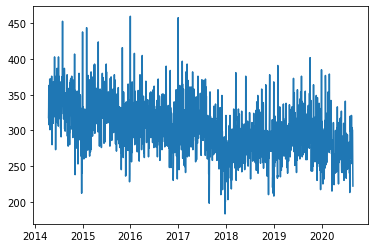

In [33]:
#line graph of date vs count for all years
plt.plot(date_df['occ_date'], date_df['crime_type'])

plt.show()

There is a lot of noise on the data set and we want to see the x axis in months
Going to break up the data by year in order to visualize it on a more appropriate time scale 

In [34]:
#make a data frame for every year using .loc
fourteen_df = date_df.loc[(date_df['occ_date'] >= "2014-04-15") & (date_df['occ_date'] <= "2014-12-31")]
#use .loc to select only full moons in order to make the full moon pics on the plot
fourteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2014-04-15") & (moon_df['Local Date'] <= "2014-12-31")]
fourteen_full_moon

,Lunar Phase,Local Date,Local Time
14,Full Moon,2014-04-15,2:45
18,Full Moon,2014-05-14,14:18
22,Full Moon,2014-06-12,23:13
26,Full Moon,2014-07-12,6:26
30,Full Moon,2014-08-10,13:10
34,Full Moon,2014-09-08,20:38
38,Full Moon,2014-10-08,5:50
42,Full Moon,2014-11-06,16:22
46,Full Moon,2014-12-06,6:27


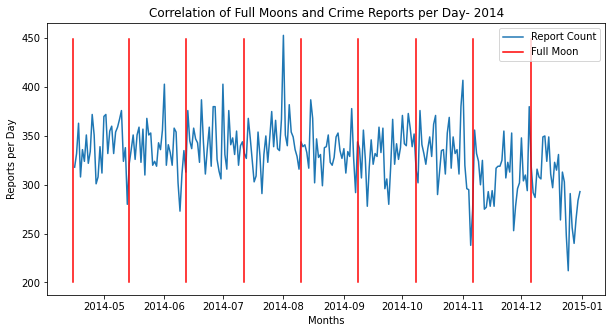

In [35]:
#use list comprehendion to create coordinates for the vertical line
#need to use a for loop in order to pull all of the full moon dates for the year 
#x value will be the date and y value will be successive points along the range of the y axis 
#specify color 

plt.figure(figsize= (10,5))
plt.plot(fourteen_df['occ_date'], fourteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in fourteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2014")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

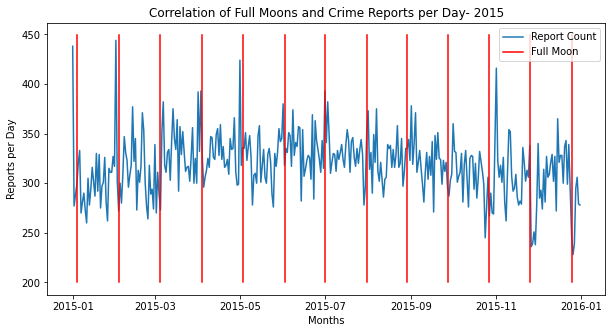

In [36]:
#repeat for 2015
fifteen_df = date_df.loc[(date_df['occ_date'] >= "2015-01-01") & (date_df['occ_date'] <= "2015-12-31")]

fifteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2015-01-01") & (moon_df['Local Date'] <= "2015-12-31")]

plt.figure(figsize= (10,5))
plt.plot(fifteen_df['occ_date'], fifteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in fifteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2015")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

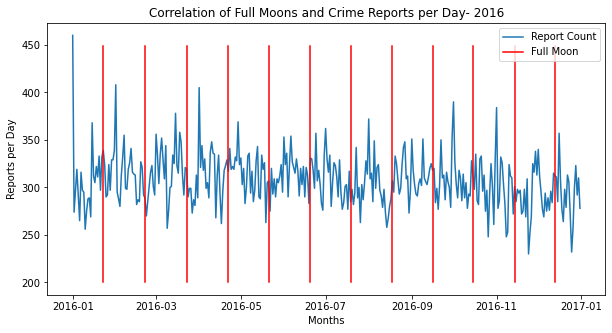

In [37]:
#repeat for 2016
sixteen_df = date_df.loc[(date_df['occ_date'] >= "2016-01-01") & (date_df['occ_date'] <= "2016-12-31")]
sixteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2016-01-01") & (moon_df['Local Date'] <= "2016-12-31")]

plt.figure(figsize= (10,5))
plt.plot(sixteen_df['occ_date'], sixteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in sixteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2016")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

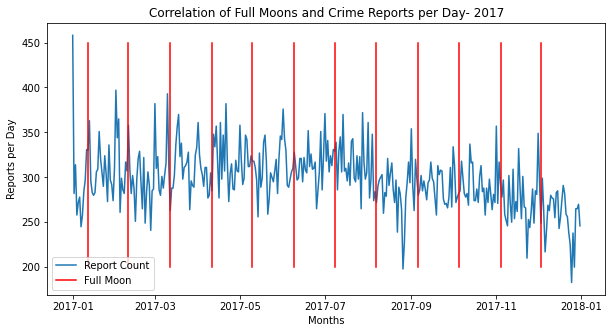

In [38]:
#repeat for 2017
seventeen_df = date_df.loc[(date_df['occ_date'] >= "2017-01-01") & (date_df['occ_date'] <= "2017-12-31")]

seventeen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2017-01-01") & (moon_df['Local Date'] <= "2017-12-31")]

plt.figure(figsize= (10,5))
plt.plot(seventeen_df['occ_date'], seventeen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in seventeen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2017")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

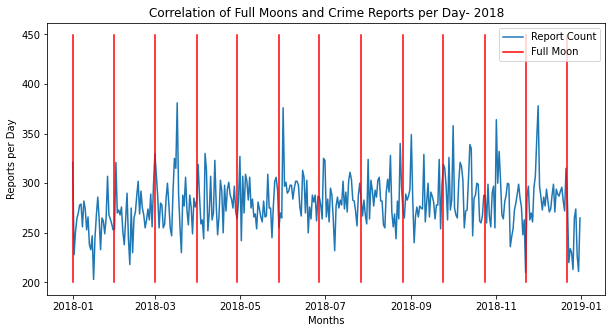

In [39]:
#repeat for 2018
eighteen_df = date_df.loc[(date_df['occ_date'] >= "2018-01-01") & (date_df['occ_date'] <= "2018-12-31")]

eighteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2018-01-01") & (moon_df['Local Date'] <= "2018-12-31")]

plt.figure(figsize= (10,5))
plt.plot(eighteen_df['occ_date'], eighteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in eighteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2018")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

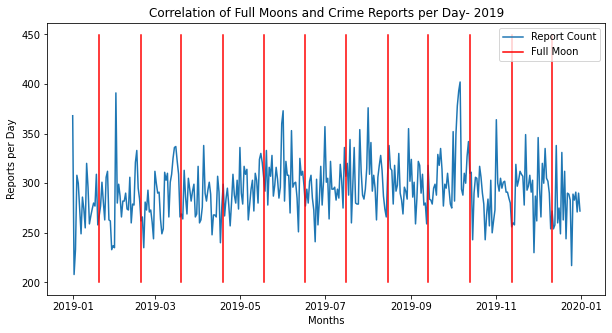

In [40]:
#repeat for 2019
nineteen_df = date_df.loc[(date_df['occ_date'] >= "2019-01-01") & (date_df['occ_date'] <= "2019-12-31")]

nineteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2019-01-01") & (moon_df['Local Date'] <= "2019-12-31")]

plt.figure(figsize= (10,5))
plt.plot(nineteen_df['occ_date'], nineteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in nineteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2019")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

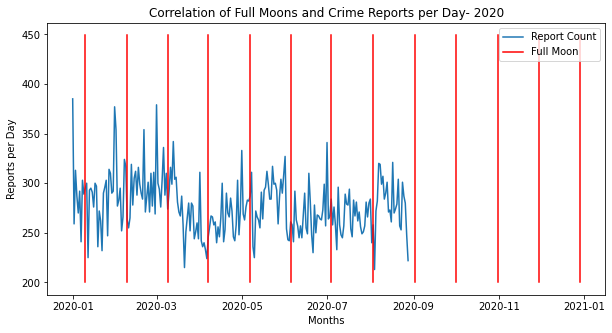

In [41]:
#repeat for 2020
twenty_df = date_df.loc[(date_df['occ_date'] >= "2020-01-01") & (date_df['occ_date'] <= "2020-12-31")]

twenty_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2020-01-01") & (moon_df['Local Date'] <= "2020-12-31")]

plt.figure(figsize= (10,5))
plt.plot(twenty_df['occ_date'], twenty_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in twenty_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2020")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [42]:
#create a df with only full moon phases across the full 7 year period (can be used for box and whisker plots) 
full_moon_list = ['Full Moon']

full_moon_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(full_moon_list)]

full_moon_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
30868,ASSAULT,2020-05-07 22:24:00,2020-05-07,2224,2020-05-07T00:00:00.000,Full Moon,2020-05-07,5:45
565300,VIOL OF PROTECTIVE ORDER,2015-06-02 00:18:00,2015-06-02,18,2015-06-04T00:00:00.000,Full Moon,2015-06-02,11:21
398963,BURGLARY,2016-11-14 17:55:00,2016-11-14,1755,2016-11-15T00:00:00.000,Full Moon,2016-11-14,7:53
680579,DISTURBANCE,2014-06-12 14:07:00,2014-06-12,1407,2014-06-12T00:00:00.000,Full Moon,2014-06-12,23:13
444094,BURGLARY,2016-06-20 09:20:00,2016-06-20,920,2016-06-20T00:00:00.000,Full Moon,2016-06-20,6:04
517486,BURGLARY,2015-10-27 20:00:00,2015-10-27,2000,2015-10-28T00:00:00.000,Full Moon,2015-10-27,7:05
354272,BURGLARY,2017-04-11 21:00:00,2017-04-11,2100,2017-04-13T00:00:00.000,Full Moon,2017-04-11,1:09
603787,POSSESSION OF FORGED WRITING,2015-02-03 16:30:00,2015-02-03,1630,2015-02-03T00:00:00.000,Full Moon,2015-02-03,17:10
80989,BURGLARY,2019-11-12 21:20:00,2019-11-12,2120,2019-11-13T00:00:00.000,Full Moon,2019-11-12,7:37
55421,CRASH/FAIL STOP AND RENDER AID,2020-02-09 13:50:00,2020-02-09,1350,2020-02-09T00:00:00.000,Full Moon,2020-02-09,1:34


In [43]:
#create df with only ne wmoon phases across full 7 year period (can be used for box and whisker plots)
new_moon_list = ['New Moon']

new_moon_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(new_moon_list)]

new_moon_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
540931,ASSAULT,2015-08-14 22:39:00,2015-08-14,2239,2015-08-15T00:00:00.000,New Moon,2015-08-14,9:54
598954,ASSAULT,2015-02-18 21:35:00,2015-02-18,2135,2015-02-18T00:00:00.000,New Moon,2015-02-18,17:49
403417,DRUG RELATED,2016-10-30 22:03:00,2016-10-30,2203,2016-10-30T00:00:00.000,New Moon,2016-10-30,12:39
430751,THEFT,2016-08-02 16:44:00,2016-08-02,1644,2016-08-02T00:00:00.000,New Moon,2016-08-02,15:46
430667,BURGLARY,2016-08-02 21:00:00,2016-08-02,2100,2016-08-03T00:00:00.000,New Moon,2016-08-02,15:46
570425,BURGLARY,2015-05-17 08:00:00,2015-05-17,800,2015-05-19T00:00:00.000,New Moon,2015-05-17,23:15
560337,BURGLARY,2015-06-16 20:30:00,2015-06-16,2030,2015-06-17T00:00:00.000,New Moon,2015-06-16,9:07
655332,TERRORISTIC THREAT,2014-08-25 07:00:00,2014-08-25,700,2014-08-25T00:00:00.000,New Moon,2014-08-25,9:13
197569,CRIMINAL MISCHIEF,2018-10-08 17:28:00,2018-10-08,1728,2018-10-08T00:00:00.000,New Moon,2018-10-08,22:47
412837,INTOXICATION CRIME,2016-09-30 01:14:00,2016-09-30,114,2016-09-30T00:00:00.000,New Moon,2016-09-30,19:13


In [101]:
#create df with only first quarter wmoon phases across full 7 year period (can be used for box and whisker plots)
new_moon_list = ['First Quarter']

first_quarter_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(new_moon_list)]

first_quarter_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
101448,ASSAULT,2019-09-05 17:47:00,2019-09-05,1747,2019-09-05T00:00:00.000,First Quarter,2019-09-05,22:11
446445,THEFT,2016-06-12 18:00:00,2016-06-12,1800,2016-06-13T00:00:00.000,First Quarter,2016-06-12,3:10
672621,BURGLARY,2014-07-05 13:30:00,2014-07-05,1330,2014-07-05T00:00:00.000,First Quarter,2014-07-05,7:00
455877,RECKLESS DAMAGE,2016-05-13 13:00:00,2016-05-13,1300,2016-05-13T00:00:00.000,First Quarter,2016-05-13,12:03
270173,FRAUD,2018-01-24 12:00:00,2018-01-24,1200,2018-02-02T00:00:00.000,First Quarter,2018-01-24,16:20
229014,ASSAULT,2018-06-20 11:38:00,2018-06-20,1138,2018-06-20T00:00:00.000,First Quarter,2018-06-20,5:52
652541,RUNAWAY CHILD,2014-09-02 17:00:00,2014-09-02,1700,2014-09-03T00:00:00.000,First Quarter,2014-09-02,6:11
519629,RUNAWAY CHILD,2015-10-20 14:00:00,2015-10-20,1400,2015-10-20T00:00:00.000,First Quarter,2015-10-20,15:32
338176,DISTURBANCE,2017-06-01 21:37:00,2017-06-01,2137,2017-06-01T00:00:00.000,First Quarter,2017-06-01,7:43
220869,THEFT,2018-07-19 10:00:00,2018-07-19,1000,2018-07-20T00:00:00.000,First Quarter,2018-07-19,14:53


In [103]:
#create df with only last quartermoon phases across full 7 year period (can be used for box and whisker plots)
new_moon_list = ['Last Quarter']

last_quarter_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(new_moon_list)]

last_quarter_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
78921,AGG ASSAULT WITH MOTOR VEH,2019-11-19 22:50:00,2019-11-19,2250,2019-11-19T00:00:00.000,Last Quarter,2019-11-19,15:13
216157,HARASSMENT,2018-08-04 21:32:00,2018-08-04,2132,2018-08-04T00:00:00.000,Last Quarter,2018-08-04,13:19
572420,DRUG RELATED,2015-05-11 02:08:00,2015-05-11,208,2015-05-11T00:00:00.000,Last Quarter,2015-05-11,5:36
166531,THEFT,2019-01-27 13:41:00,2019-01-27,1341,2019-01-27T00:00:00.000,Last Quarter,2019-01-27,15:12
591782,INTOXICATION CRIME,2015-03-13 20:01:00,2015-03-13,2001,2015-03-13T00:00:00.000,Last Quarter,2015-03-13,12:49
562899,VIOL CITY ORDINANCE - CURFEW,2015-06-09 04:37:00,2015-06-09,437,2015-06-09T00:00:00.000,Last Quarter,2015-06-09,10:43
479015,DISTURBANCE,2016-03-01 12:47:00,2016-03-01,1247,2016-03-01T00:00:00.000,Last Quarter,2016-03-01,17:12
450941,ASSAULT,2016-05-29 18:22:00,2016-05-29,1822,2016-05-29T00:00:00.000,Last Quarter,2016-05-29,7:13
488187,DISTURBANCE,2016-01-31 22:10:00,2016-01-31,2210,2016-01-31T00:00:00.000,Last Quarter,2016-01-31,21:29
123286,DRUG RELATED,2019-06-25 09:51:00,2019-06-25,951,2019-06-25T00:00:00.000,Last Quarter,2019-06-25,4:48


In [100]:
lunar_one_df = pd.merge(full_moon_df, new_moon_df, on=['crime_type', 'occ_date_time', 'occ_date', 'occ_time', 'rep_date', 'Lunar Phase', 'Local Date', 'Local Time'], how='left').fillna(0)
lunar_one_df.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
0,DRUG RELATED,2020-08-03 23:50:00,2020-08-03,2350,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
1,ASSAULT,2020-08-03 23:30:00,2020-08-03,2330,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
2,ASSAULT,2020-08-03 23:11:00,2020-08-03,2311,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
3,BURGLARY,2020-08-03 23:10:00,2020-08-03,2310,2020-08-03T00:00:00.000,Full Moon,2020-08-03,10:59
4,CRIMINAL MISCHIEF,2020-08-03 23:00:00,2020-08-03,2300,2020-08-06T00:00:00.000,Full Moon,2020-08-03,10:59


In [104]:
lunar_two_df = pd.merge(first_quarter_df, last_quarter_df, on=['crime_type', 'occ_date_time', 'occ_date', 'occ_time', 'rep_date', 'Lunar Phase', 'Local Date', 'Local Time'], how='left').fillna(0)
lunar_two_df.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
0,UNLAWFUL CARRYING WEAPON,2020-08-25 23:52:00,2020-08-25,2352,2020-08-25T00:00:00.000,First Quarter,2020-08-25,12:59
1,DISTURBANCE,2020-08-25 23:46:00,2020-08-25,2346,2020-08-27T00:00:00.000,First Quarter,2020-08-25,12:59
2,DISTURBANCE,2020-08-25 23:43:00,2020-08-25,2343,2020-08-25T00:00:00.000,First Quarter,2020-08-25,12:59
3,DRUG RELATED,2020-08-25 23:39:00,2020-08-25,2339,2020-08-25T00:00:00.000,First Quarter,2020-08-25,12:59
4,BURGLARY,2020-08-25 23:34:00,2020-08-25,2334,2020-08-25T00:00:00.000,First Quarter,2020-08-25,12:59


In [105]:
combined_lunar_phase_df = pd.merge(lunar_one_df, lunar_two_df, on=['crime_type', 'occ_date_time', 'occ_date', 'occ_time', 'rep_date', 'Lunar Phase', 'Local Date', 'Local Time'], how='left').fillna(0)
combined_lunar_phase_df.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
0,DRUG RELATED,2020-08-03 23:50:00,2020-08-03,2350,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
1,ASSAULT,2020-08-03 23:30:00,2020-08-03,2330,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
2,ASSAULT,2020-08-03 23:11:00,2020-08-03,2311,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
3,BURGLARY,2020-08-03 23:10:00,2020-08-03,2310,2020-08-03T00:00:00.000,Full Moon,2020-08-03,10:59
4,CRIMINAL MISCHIEF,2020-08-03 23:00:00,2020-08-03,2300,2020-08-06T00:00:00.000,Full Moon,2020-08-03,10:59


In [106]:
combined_lunar_phase_df.count()

crime_type       23222
occ_date_time    23222
occ_date         23222
occ_time         23222
rep_date         23222
Lunar Phase      23222
Local Date       23222
Local Time       23222
dtype: int64

In [110]:
combined_lunar_phase_df.dtypes

crime_type               object
occ_date_time    datetime64[ns]
occ_date         datetime64[ns]
occ_time                 object
rep_date                 object
Lunar Phase              object
Local Date       datetime64[ns]
Local Time               object
dtype: object

In [127]:

#create a list of only the crimes we want               
crime_stats = ['THEFT', 'DISTURBANCE', 'BURGLARY', 'ASSAULT', 'INTOXICATION CRIME', 'CRIMINAL MISCHIEF', 'DRUG RELATED', 'FRAUD', 'HARASSMENT', 'RUNAWAY CHILD']

crime_stats_df = combined_lunar_phase_df.loc[combined_lunar_phase_df['crime_type'].isin(crime_list)]

crime_stats_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
1641,DISTURBANCE,2020-02-09 21:23:00,2020-02-09,2123,2020-02-09T00:00:00.000,Full Moon,2020-02-09,1:34
6091,INTOXICATION CRIME,2018-11-22 02:02:00,2018-11-22,202,2018-11-22T00:00:00.000,Full Moon,2018-11-22,23:41
3887,ASSAULT,2019-07-16 05:54:00,2019-07-16,554,2019-07-16T00:00:00.000,Full Moon,2019-07-16,16:39
12352,DRUG RELATED,2017-02-10 13:46:00,2017-02-10,1346,2017-02-10T00:00:00.000,Full Moon,2017-02-10,18:33
11252,DISTURBANCE,2017-06-09 03:12:00,2017-06-09,312,2017-06-09T00:00:00.000,Full Moon,2017-06-09,8:11
14574,ASSAULT,2016-07-19 13:00:00,2016-07-19,1300,2016-07-19T00:00:00.000,Full Moon,2016-07-19,17:59
7365,DRUG RELATED,2018-06-27 18:13:00,2018-06-27,1813,2018-06-27T00:00:00.000,Full Moon,2018-06-27,23:54
17035,FRAUD,2015-11-25 13:37:00,2015-11-25,1337,2015-11-25T00:00:00.000,Full Moon,2015-11-25,16:44
13009,DRUG RELATED,2016-12-13 15:26:00,2016-12-13,1526,2016-12-13T00:00:00.000,Full Moon,2016-12-13,18:06
1639,CRIMINAL MISCHIEF,2020-02-09 21:24:00,2020-02-09,2124,2020-02-09T00:00:00.000,Full Moon,2020-02-09,1:34


In [131]:
combined_lunar_phase_df['Lunar Phase'].value_counts()

Full Moon    23222
Name: Lunar Phase, dtype: int64

In [44]:
#create a list of only the crimes we want               
crime_list = ['THEFT', 'DISTURBANCE', 'BURGLARY', 'ASSAULT', 'INTOXICATION CRIME', 'CRIMINAL MISCHIEF', 'DRUG RELATED', 'FRAUD', 'HARASSMENT', 'RUNAWAY CHILD']

top_crime_df = crime_grouped.loc[crime_grouped['crime_type'].isin(crime_list)]

top_crime_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
535540,DISTURBANCE,2015-08-31 10:30:00,2015-08-31,1030,2015-08-31T00:00:00.000,NaN,NaT,NaN
282380,INTOXICATION CRIME,2017-12-08 02:43:00,2017-12-08,243,2017-12-08T00:00:00.000,NaN,NaT,NaN
584862,BURGLARY,2015-04-03 14:44:00,2015-04-03,1444,2015-04-03T00:00:00.000,NaN,NaT,NaN
379781,ASSAULT,2017-01-18 18:41:00,2017-01-18,1841,2017-01-18T00:00:00.000,NaN,NaT,NaN
456960,DRUG RELATED,2016-05-09 22:37:00,2016-05-09,2237,2016-05-09T00:00:00.000,NaN,NaT,NaN
207689,ASSAULT,2018-09-03 13:58:00,2018-09-03,1358,2018-09-03T00:00:00.000,NaN,NaT,NaN
354253,THEFT,2017-04-11 22:00:00,2017-04-11,2200,2017-04-12T00:00:00.000,Full Moon,2017-04-11,1:09
293572,DISTURBANCE,2017-10-28 12:34:00,2017-10-28,1234,2017-10-28T00:00:00.000,NaN,NaT,NaN
461043,ASSAULT,2016-04-27 08:33:00,2016-04-27,833,2016-04-27T00:00:00.000,NaN,NaT,NaN
210971,FRAUD,2018-08-23 06:40:00,2018-08-23,640,2018-08-23T00:00:00.000,NaN,NaT,NaN


In [132]:
top_crime_df['Lunar Phase'].value_counts()

First Quarter    19272
Last Quarter     19213
New Moon         19141
Full Moon        18776
Name: Lunar Phase, dtype: int64

In [45]:

intox_list = ['INTOXICATION CRIME']

intox_crime_df = crime_grouped.loc[crime_grouped['crime_type'].isin(intox_list)]

intox_crime_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
194322,INTOXICATION CRIME,2018-10-19 19:41:00,2018-10-19,1941,2018-10-19T00:00:00.000,NaN,NaT,NaN
672081,INTOXICATION CRIME,2014-07-07 02:32:00,2014-07-07,232,2014-07-07T00:00:00.000,NaN,NaT,NaN
456782,INTOXICATION CRIME,2016-05-10 16:20:00,2016-05-10,1620,2016-05-10T00:00:00.000,NaN,NaT,NaN
53913,INTOXICATION CRIME,2020-02-14 21:00:00,2020-02-14,2100,2020-02-14T00:00:00.000,NaN,NaT,NaN
412355,INTOXICATION CRIME,2016-10-01 09:52:00,2016-10-01,952,2016-10-01T00:00:00.000,NaN,NaT,NaN
198761,INTOXICATION CRIME,2018-10-04 19:54:00,2018-10-04,1954,2018-10-04T00:00:00.000,NaN,NaT,NaN
230560,INTOXICATION CRIME,2018-06-14 22:34:00,2018-06-14,2234,2018-06-15T00:00:00.000,NaN,NaT,NaN
639687,INTOXICATION CRIME,2014-10-11 02:23:00,2014-10-11,223,2014-10-11T00:00:00.000,NaN,NaT,NaN
210435,INTOXICATION CRIME,2018-08-24 22:48:00,2018-08-24,2248,2018-08-24T00:00:00.000,NaN,NaT,NaN
635798,INTOXICATION CRIME,2014-10-22 20:01:00,2014-10-22,2001,2014-10-22T00:00:00.000,NaN,NaT,NaN


In [133]:
intox_crime_df['Lunar Phase'].value_counts()

Full Moon        1395
Last Quarter     1392
New Moon         1381
First Quarter    1372
Name: Lunar Phase, dtype: int64

In [46]:
assault_list = ['ASSAULT']

assault_df = crime_grouped.loc[crime_grouped['crime_type'].isin(assault_list)]

assault_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
6841,ASSAULT,2020-08-04 18:52:00,2020-08-04,1852,2020-08-04T00:00:00.000,NaN,NaT,NaN
333114,ASSAULT,2017-06-18 02:04:00,2017-06-18,204,2017-06-18T00:00:00.000,NaN,NaT,NaN
429740,ASSAULT,2016-08-05 20:00:00,2016-08-05,2000,2016-08-18T00:00:00.000,NaN,NaT,NaN
30218,ASSAULT,2020-05-10 10:43:00,2020-05-10,1043,2020-05-10T00:00:00.000,NaN,NaT,NaN
373592,ASSAULT,2017-02-07 16:33:00,2017-02-07,1633,2017-02-07T00:00:00.000,NaN,NaT,NaN
124627,ASSAULT,2019-06-20 12:18:00,2019-06-20,1218,2019-06-20T00:00:00.000,NaN,NaT,NaN
620067,ASSAULT,2014-12-11 19:24:00,2014-12-11,1924,2014-12-11T00:00:00.000,NaN,NaT,NaN
565652,ASSAULT,2015-06-01 03:30:00,2015-06-01,330,2015-06-01T00:00:00.000,NaN,NaT,NaN
669929,ASSAULT,2014-07-13 15:15:00,2014-07-13,1515,2014-07-13T00:00:00.000,NaN,NaT,NaN
154309,ASSAULT,2019-03-12 02:03:00,2019-03-12,203,2019-03-12T00:00:00.000,NaN,NaT,NaN


In [134]:
intox_crime_df['Lunar Phase'].value_counts()

Full Moon        1395
Last Quarter     1392
New Moon         1381
First Quarter    1372
Name: Lunar Phase, dtype: int64

In [47]:
steal_list = ['THEFT', 'BURGLARY']

steal_df = crime_grouped.loc[crime_grouped['crime_type'].isin(steal_list)]

steal_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
25930,THEFT,2020-05-25 14:30:00,2020-05-25,1430,2020-07-04T00:00:00.000,NaN,NaT,NaN
91983,THEFT,2019-10-06 16:00:00,2019-10-06,1600,2019-10-09T00:00:00.000,NaN,NaT,NaN
480180,BURGLARY,2016-02-26 19:15:00,2016-02-26,1915,2016-02-26T00:00:00.000,NaN,NaT,NaN
117593,THEFT,2019-07-14 09:35:00,2019-07-14,935,2019-08-20T00:00:00.000,NaN,NaT,NaN
128387,BURGLARY,2019-06-07 19:33:00,2019-06-07,1933,2019-06-07T00:00:00.000,NaN,NaT,NaN
185823,BURGLARY,2018-11-18 22:00:00,2018-11-18,2200,2018-11-18T00:00:00.000,NaN,NaT,NaN
289857,BURGLARY,2017-11-10 15:00:00,2017-11-10,1500,2017-11-11T00:00:00.000,Last Quarter,2017-11-10,14:38
677573,BURGLARY,2014-06-21 02:00:00,2014-06-21,200,2014-06-21T00:00:00.000,NaN,NaT,NaN
698484,THEFT,2014-04-20 15:20:00,2014-04-20,1520,2018-04-20T00:00:00.000,NaN,NaT,NaN
47185,THEFT,2020-03-08 04:45:00,2020-03-08,445,2020-03-11T00:00:00.000,NaN,NaT,NaN


In [135]:
steal_df['Lunar Phase'].value_counts()

First Quarter    7453
New Moon         7412
Last Quarter     7257
Full Moon        7245
Name: Lunar Phase, dtype: int64

In [48]:
drug_list = ['DRUG RELATED']

drug_df = crime_grouped.loc[crime_grouped['crime_type'].isin(drug_list)]

drug_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
135859,DRUG RELATED,2019-05-14 19:16:00,2019-05-14,1916,2019-05-14T00:00:00.000,NaN,NaT,NaN
289182,DRUG RELATED,2017-11-13 00:40:00,2017-11-13,40,2017-11-13T00:00:00.000,NaN,NaT,NaN
203135,DRUG RELATED,2018-09-19 20:50:00,2018-09-19,2050,2018-09-19T00:00:00.000,NaN,NaT,NaN
240787,DRUG RELATED,2018-05-09 21:32:00,2018-05-09,2132,2018-05-09T00:00:00.000,NaN,NaT,NaN
354534,DRUG RELATED,2017-04-10 22:02:00,2017-04-10,2202,2017-04-10T00:00:00.000,NaN,NaT,NaN
378909,DRUG RELATED,2017-01-21 12:06:00,2017-01-21,1206,2017-01-21T00:00:00.000,NaN,NaT,NaN
530550,DRUG RELATED,2015-09-15 19:36:00,2015-09-15,1936,2015-09-15T00:00:00.000,NaN,NaT,NaN
328255,DRUG RELATED,2017-07-03 14:43:00,2017-07-03,1443,2017-07-03T00:00:00.000,NaN,NaT,NaN
568896,DRUG RELATED,2015-05-22 04:12:00,2015-05-22,412,2015-05-22T00:00:00.000,NaN,NaT,NaN
655503,DRUG RELATED,2014-08-24 19:04:00,2014-08-24,1904,2014-08-24T00:00:00.000,NaN,NaT,NaN


In [136]:
drug_df['Lunar Phase'].value_counts()

First Quarter    1126
Last Quarter     1124
Full Moon        1033
New Moon         1025
Name: Lunar Phase, dtype: int64

-annual daily report numbers with full moon lines plotted on top
    -2014
    -2015
    -2016
    -2017
    -2018
    -2019
    -2020
    -2021 (erin)
    
-COMPLETED plot report numbers over all reporting years

-box and whisker plots for all years of data, separate boxes for separate moon phases to see if there is a trend (jon)

-line graph of 3-5 months with all moon phase lines plotted on top (Fatima)

-measure of central tendency for all full moons in datasets (report counts) (greg)

-split out violent vs nonviolent crimes for line graphs over 1-2 years and box and whisker plots 



In [49]:
#Compute Summary Stats and Measures of Central Tendency. Need to get the top crimes by count
summary = pd.DataFrame(crime_moon_df.groupby('crime_type').count())
summary

,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
crime_type,,,,,,,
ABUSE OF 911,51,51,51,51,6,6,6
ABUSE OF CORPSE,2,2,2,2,2,2,2
ABUSE OF OFFICIAL CAPACITY,7,7,7,7,0,0,0
AGG ASLT ENHANC STRANGL/SUFFOC,451,451,451,451,58,58,58
AGG ASLT STRANGLE/SUFFOCATE,3800,3800,3800,3800,514,514,514
...,...,...,...,...,...,...,...
VOCO AMPLIFIED MUSIC/VEHICLE,47,47,47,47,10,10,10
VOCO SOLICITATION PROHIBIT,534,534,534,534,94,94,94
VOYEURISM-PEEPING TOM,1,1,1,1,0,0,0


In [50]:
# Sort crimes by the top 15 reported crimes
rslt_df =summary.sort_values(by = 'occ_date_time', ascending = False)
rslt_df.head(50)

,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
crime_type,,,,,,,
FAMILY DISTURBANCE,67773,67773,67773,67773,9173,9173,9173
BURGLARY OF VEHICLE,63740,63740,63740,63740,8588,8588,8588
THEFT,62289,62289,62289,62289,8341,8341,8341
CRIMINAL MISCHIEF,35115,35115,35115,35115,4770,4770,4770
ASSAULT W/INJURY-FAM/DATE VIOL,22461,22461,22461,22461,3026,3026,3026
DISTURBANCE - OTHER,21832,21832,21832,21832,2959,2959,2959
THEFT BY SHOPLIFTING,20994,20994,20994,20994,2863,2863,2863
DWI,18987,18987,18987,18987,2622,2622,2622
HARASSMENT,17185,17185,17185,17185,2276,2276,2276


In [51]:
# Keep the top 15 reported crimes and drop the rest
summary_stats = rslt_df[:15]
summary_stats

,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
crime_type,,,,,,,
FAMILY DISTURBANCE,67773,67773,67773,67773,9173,9173,9173
BURGLARY OF VEHICLE,63740,63740,63740,63740,8588,8588,8588
THEFT,62289,62289,62289,62289,8341,8341,8341
CRIMINAL MISCHIEF,35115,35115,35115,35115,4770,4770,4770
ASSAULT W/INJURY-FAM/DATE VIOL,22461,22461,22461,22461,3026,3026,3026
DISTURBANCE - OTHER,21832,21832,21832,21832,2959,2959,2959
THEFT BY SHOPLIFTING,20994,20994,20994,20994,2863,2863,2863
DWI,18987,18987,18987,18987,2622,2622,2622
HARASSMENT,17185,17185,17185,17185,2276,2276,2276


In [52]:
summary_stats.count()


occ_date_time    15
occ_date         15
occ_time         15
rep_date         15
Lunar Phase      15
Local Date       15
Local Time       15
dtype: int64

In [53]:
# Missing or Null values
summary_stats.isnull().sum()

occ_date_time    0
occ_date         0
occ_time         0
rep_date         0
Lunar Phase      0
Local Date       0
Local Time       0
dtype: int64

In [54]:
# only provides a summary of counts or number of incidents...not very useful
summary_stats.describe()

,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,27808.133333,27808.133333,27808.133333,27808.133333,3757.866667,3757.866667,3757.866667
std,19856.763835,19856.763835,19856.763835,19856.763835,2671.174190,2671.174190,2671.174190
min,12474.000000,12474.000000,12474.000000,12474.000000,1698.000000,1698.000000,1698.000000
25%,15836.000000,15836.000000,15836.000000,15836.000000,2162.000000,2162.000000,2162.000000
50%,18987.000000,18987.000000,18987.000000,18987.000000,2622.000000,2622.000000,2622.000000
75%,28788.000000,28788.000000,28788.000000,28788.000000,3898.000000,3898.000000,3898.000000
max,67773.000000,67773.000000,67773.000000,67773.000000,9173.000000,9173.000000,9173.000000


In [55]:
# Drop duplicate Lunar Phases
summary_stats.drop_duplicates(subset=['Lunar Phase'], keep=False, inplace=False)


,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
crime_type,,,,,,,
FAMILY DISTURBANCE,67773,67773,67773,67773,9173,9173,9173
BURGLARY OF VEHICLE,63740,63740,63740,63740,8588,8588,8588
THEFT,62289,62289,62289,62289,8341,8341,8341
CRIMINAL MISCHIEF,35115,35115,35115,35115,4770,4770,4770
ASSAULT W/INJURY-FAM/DATE VIOL,22461,22461,22461,22461,3026,3026,3026
DISTURBANCE - OTHER,21832,21832,21832,21832,2959,2959,2959
THEFT BY SHOPLIFTING,20994,20994,20994,20994,2863,2863,2863
DWI,18987,18987,18987,18987,2622,2622,2622
HARASSMENT,17185,17185,17185,17185,2276,2276,2276


In [56]:
print(summary_stats['Lunar Phase'])


crime_type
FAMILY DISTURBANCE                9173
BURGLARY OF VEHICLE               8588
THEFT                             8341
CRIMINAL MISCHIEF                 4770
ASSAULT W/INJURY-FAM/DATE VIOL    3026
DISTURBANCE - OTHER               2959
THEFT BY SHOPLIFTING              2863
DWI                               2622
HARASSMENT                        2276
BURGLARY OF RESIDENCE             2236
ASSAULT WITH INJURY               2166
AUTO THEFT                        2158
RUNAWAY CHILD                     1698
POSSESSION OF MARIJUANA           1733
PUBLIC INTOXICATION               1759
Name: Lunar Phase, dtype: int64


In [87]:
# Summary Stats computing Mean of crime type and lunar phase
summary_stats["Mean"]=pd.DataFrame(summary_stats.groupby("crime_type")["occ_date_time"].mean())
summary_stats

<ipython-input-87-da0e9b8251fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_stats["Mean"]=pd.DataFrame(summary_stats.groupby("crime_type")["occ_date_time"].mean())


,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time,Mean,Median
crime_type,,,,,,,,,
FAMILY DISTURBANCE,67773,67773,67773,67773,9173,9173,9173,67773,9173
BURGLARY OF VEHICLE,63740,63740,63740,63740,8588,8588,8588,63740,8588
THEFT,62289,62289,62289,62289,8341,8341,8341,62289,8341
CRIMINAL MISCHIEF,35115,35115,35115,35115,4770,4770,4770,35115,4770
ASSAULT W/INJURY-FAM/DATE VIOL,22461,22461,22461,22461,3026,3026,3026,22461,3026
DISTURBANCE - OTHER,21832,21832,21832,21832,2959,2959,2959,21832,2959
THEFT BY SHOPLIFTING,20994,20994,20994,20994,2863,2863,2863,20994,2863
DWI,18987,18987,18987,18987,2622,2622,2622,18987,2622
HARASSMENT,17185,17185,17185,17185,2276,2276,2276,17185,2276


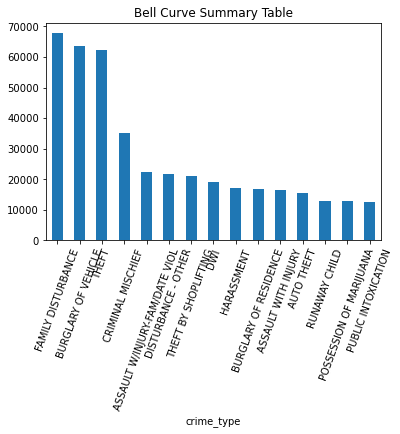

In [88]:
# Plot Summary Mean
summary_stats["Mean"].plot.bar(x="Crime Type", y="Mean", rot=70, title="Bell Curve Summary Table");
plt.show(block=True);

In [76]:
# Summary Stats computing Median of crime type and lunar phase
summary_stats["Median"]=pd.DataFrame(summary_stats.groupby("crime_type")["Lunar Phase"].median())
summary_stats

moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon')

<ipython-input-76-d7e21e839947>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_stats["Median"]=pd.DataFrame(summary_stats.groupby("crime_type")["Lunar Phase"].median())


,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time,Mean,Median
crime_type,,,,,,,,,
FAMILY DISTURBANCE,67773,67773,67773,67773,9173,9173,9173,9173,9173
BURGLARY OF VEHICLE,63740,63740,63740,63740,8588,8588,8588,8588,8588
THEFT,62289,62289,62289,62289,8341,8341,8341,8341,8341
CRIMINAL MISCHIEF,35115,35115,35115,35115,4770,4770,4770,4770,4770
ASSAULT W/INJURY-FAM/DATE VIOL,22461,22461,22461,22461,3026,3026,3026,3026,3026
DISTURBANCE - OTHER,21832,21832,21832,21832,2959,2959,2959,2959,2959
THEFT BY SHOPLIFTING,20994,20994,20994,20994,2863,2863,2863,2863,2863
DWI,18987,18987,18987,18987,2622,2622,2622,2622,2622
HARASSMENT,17185,17185,17185,17185,2276,2276,2276,2276,2276
